# NonLinear Regression Lab

In this lab, we use the `Wage` dataset in the ISLR textbook. I put a copy of the data at https://www.palmetto.clemson.edu/dsci/datasets/isl/Wage.csv.

Reference: ISLR-Python, https://github.com/JWarmenhoven/ISLR-python

## 0. Set Up the environments

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, r2_score


import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set()

## 1. Get the Data

In [2]:
wage = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Wage.csv")
wage.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [4]:
wage.describe()

,ID,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921506
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [5]:
def load_wage_date():
    return pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Wage.csv")

## 2. Plot the data

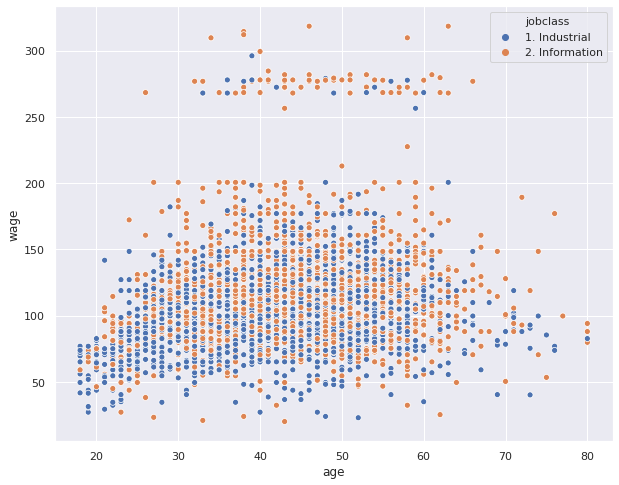

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="age", y="wage", data=wage, hue="jobclass")
plt.show()

## 3 Linear Regression

In [7]:
### 3.1 Split data into train and test data

In [8]:
train_data, test_data = train_test_split(wage, test_size=0.33, random_state=6300)

### a. Implement a Simple Linear Regression using scikit-learn

In [9]:
response="wage"
for predictor in ["age"]:
    X = train_data[predictor][:, np.newaxis]
    y = train_data[response]

    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    X_test = test_data[predictor][:, np.newaxis]
    y_test= test_data[response]
    y_pred = model.predict(X_test)

    print("#"*5, "Simple Linear Regression {}~{}".format(response, predictor))
    print("Model slopes: ", model.coef_, "Model intercept:", model.intercept_)
    print("explained variance: ", explained_variance_score(y_test, y_pred))
    print("R2: ",r2_score(y_test, y_pred))
    print("Max error: ", max_error(y_test, y_pred))
    print()

##### Simple Linear Regression wage~age
Model slopes:  [0.69173807] Model intercept: 81.10778028276331
explained variance:  0.0365319083967478
R2:  0.0288509693610024
Max error:  204.9448966687077



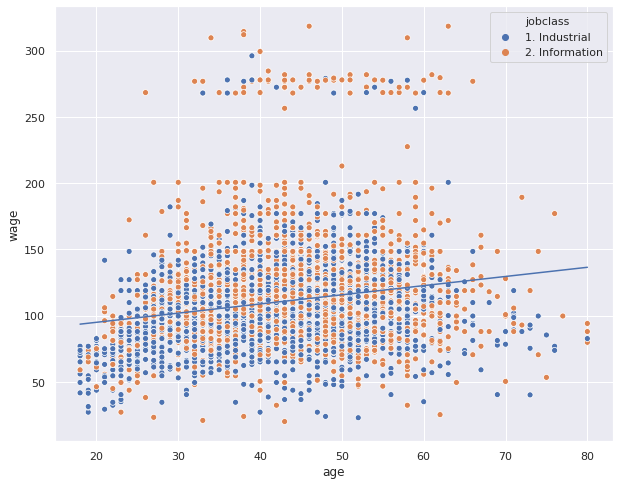

In [10]:
df = wage[['age', 'wage']]
x = np.array([df['age'].min(), df['age'].max()])
y = model.predict(x[:, np.newaxis])

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="age", y="wage", data=wage, hue="jobclass")
sns.lineplot(x, y)
plt.show()

### b. Implement a Simple Linear Regression using statsmodels

In [11]:
response="wage"
predictor=["age"]
    
y_train = train_data[response]
X_train = train_data[predictor]
X_train = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     80.42
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           6.75e-19
Time:                        14:03:29   Log-Likelihood:                -10266.
No. Observations:                2010   AIC:                         2.054e+04
Df Residuals:                    2008   BIC:                         2.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1078      3.372     24.050      0.000      74.494      87.722
x1             0.6917      0.077      8.968      0.000       0.540       0.843
==============================================================================
Omnibus:                      732.414   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3251.102
Skew:                           1.706   Prob(JB):                         0.00
Kurtosis:                       8.213   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X_test = test_data[predictor]
y_test= test_data[response]
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [13]:
print("Model: slopes =", model.params[1], "intercept =", model.params[0])
print("explained variance: ", explained_variance_score(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))
print("Max error: ", max_error(y_test, y_pred))

Model: slopes = 0.6917380690743826 intercept = 81.10778028276346
explained variance:  0.0365319083967478
R2:  0.028850969361003176
Max error:  204.94489666870754


In [14]:
model = smf.ols('wage ~ age', data=train_data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,81.1078,3.372,24.050,0.000,74.494,87.722
age,0.6917,0.077,8.968,0.000,0.540,0.843


In [15]:
X_test = test_data[predictor]
y_test= test_data[response]
y_pred = model.predict(X_test)

print("Model: slopes =", model.params[1], "intercept =", model.params[0])
print("explained variance: ", explained_variance_score(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))
print("Max error: ", max_error(y_test, y_pred))

Model: slopes = 0.6917380690743826 intercept = 81.10778028276346
explained variance:  0.0365319083967478
R2:  0.028850969361003176
Max error:  204.94489666870754


In [16]:
## Plot with Seaborn

### Seaborn regplot

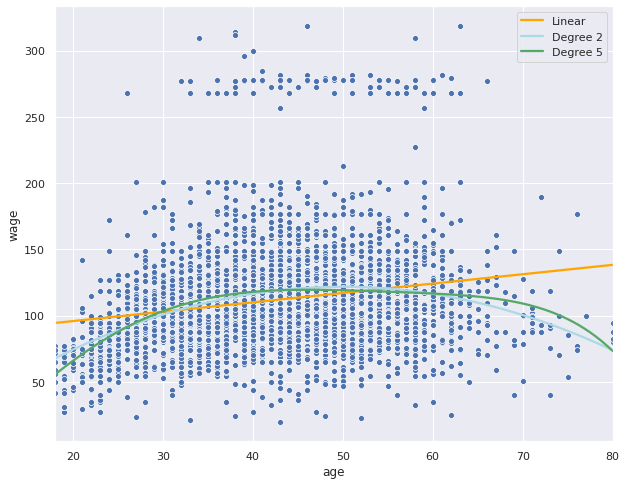

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="age", y="wage", data=wage)
sns.regplot(wage.age, wage.wage, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(wage.age, wage.wage, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(wage.age, wage.wage, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.show()

### Locally weighted regression

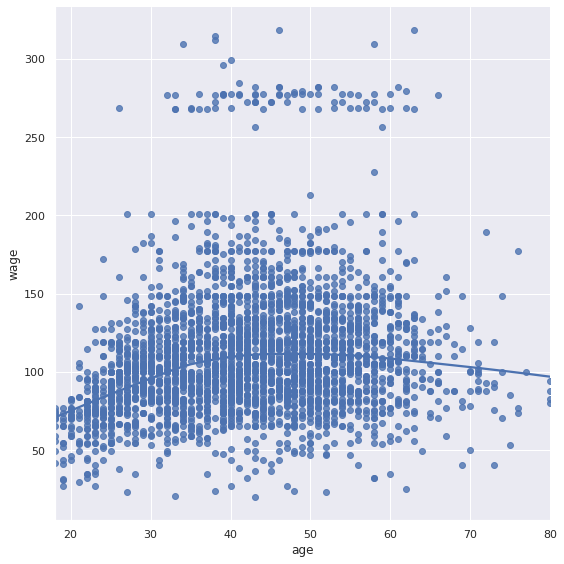

In [18]:
sns.lmplot(x="age", y="wage", data=wage, lowess=True, height=8)
plt.show()

## 4. Polynomial Regression

We perform a polynomial regression on the relation `wage~age`.

### Build and train a polynomial regression model

In [19]:
from sklearn.preprocessing import PolynomialFeatures

wage = load_wage_date()
train_data, test_data = train_test_split(wage, test_size=0.33, random_state=6300)

X_train = train_data[["age"]]
y_train = train_data['wage']
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train2 = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train2, y_train)

LinearRegression()

In [20]:
y_fit = model.predict(X_train2)

### Evaluate training performance and predict performance

In [21]:
y_fit = model.predict(X_train2)
print("explained variance: ", explained_variance_score(y_train, y_fit))
print("R2: ",r2_score(y_train, y_fit))

explained variance:  0.08036418441850379
R2:  0.08036418441850379


In [22]:
X_test = train_data[["age"]]
y_test = train_data['wage']
X_test2 = poly.fit_transform(X_test)
y_pred = model.predict(X_test2)
print("explained variance: ", explained_variance_score(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))

explained variance:  0.08036418441850379
R2:  0.08036418441850379


### Create a Pipeline

It is inconvennient to apply polynomial feature transform and then model fit/predict to the training and testing data. Therefore, we can create a pipeline to assemble them into a single model.

In [23]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=True), LinearRegression())
pipeline

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Rewrite the polynomial regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

wage = load_wage_date()
train_data, test_data = train_test_split(wage, test_size=0.33, random_state=6300)

X_train = train_data[["age"]]
y_train = train_data['wage']
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=True), LinearRegression())
model.fit(X_train, y_train)
y_fit = model.predict(X_train)
print("explained variance: ", explained_variance_score(y_train, y_fit))
print("R2: ",r2_score(y_train, y_fit))

explained variance:  0.08036418441850379
R2:  0.08036418441850379


### Try multiple plonomials with different degrees

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

wage = load_wage_date()
train_data, test_data = train_test_split(wage, test_size=0.33, random_state=6300)

perf = []
for deg in range(2, 8):
    X_train = train_data[["age"]]
    y_train = train_data['wage']
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=True), LinearRegression())
    model.fit(X_train, y_train)
    y_fit = model.predict(X_train)
    
    
    X_test = test_data[["age"]]
    y_test = test_data['wage']
    y_pred = model.predict(X_test)
    
    perf.append({
        'degree': deg,
        'train_data_explained_variance': explained_variance_score(y_train, y_fit),
        'train_data_R^2': r2_score(y_train, y_fit),
        'test_data_explained_variance': explained_variance_score(y_test, y_pred),
        'test_data_R^2': r2_score(y_test, y_pred)
    })
perf_df = pd.DataFrame(perf)
perf_df

,degree,train_data_explained_variance,train_data_R^2,test_data_explained_variance,test_data_R^2
0,2,0.080364,0.080364,0.083412,0.076376
1,3,0.082167,0.082167,0.088179,0.081268
2,4,0.083650,0.083650,0.087975,0.080290
3,5,0.083860,0.083860,0.086894,0.078770
4,6,0.083911,0.083911,0.089259,0.081321
5,7,0.084850,0.084850,0.082621,0.076064


### Replace scikit-learn Linear Regression with statsmodels GLS

+ OLS - ordinary least squares
+ WLS - weighted least squares
+ GLS - genearlized least squares

Weighted least squares (WLS), also known as weighted linear regression, is a generalization of ordinary least squares and linear regression in which the errors covariance matrix is allowed to be different from an identity matrix. WLS is also a 
specialization of generalized least squares in which the above matrix is diagonal.

GLS is a technique for estimating the unknown parameters in a linear regression model when there is a certain degree of correlation between the residuals in a regression model. In these cases, ordinary least squares and weighted least squares can be statistically inefficient, or even give misleading inferences.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

wage = load_wage_date()
train_data, test_data = train_test_split(wage, test_size=0.33, random_state=6300)

perf = []
for deg in [4]:
    X_train = train_data[["age"]]
    y_train = train_data['wage']
    
    poly = PolynomialFeatures(degree=deg, include_bias=True)
    X_train2 = poly.fit_transform(X_train)

    # model = sm.OLS(y_train, X_train2).fit()
    model = sm.GLS(y_train, X_train2).fit()
    
    print(model.summary())
    y_fit = model.predict(X_train2)
    
    
    X_test = test_data[["age"]]
    y_test = test_data['wage']
    X_test2 = poly.fit_transform(X_test)
    y_pred = model.predict(X_test2)
    
    perf.append({
        'degree': deg,
        'train_data_explained_variance': explained_variance_score(y_train, y_fit),
        'train_data_R^2': r2_score(y_train, y_fit),
        'test_data_explained_variance': explained_variance_score(y_test, y_pred),
        'test_data_R^2': r2_score(y_test, y_pred)
    })
perf_df = pd.DataFrame(perf)
perf_df

                            GLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.084
Model:                            GLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     45.76
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           7.86e-37
Time:                        14:03:31   Log-Likelihood:                -10218.
No. Observations:                2010   AIC:                         2.045e+04
Df Residuals:                    2005   BIC:                         2.047e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -188.6196     76.668     -2.460      0.0

,degree,train_data_explained_variance,train_data_R^2,test_data_explained_variance,test_data_R^2
0,4,0.08365,0.08365,0.087975,0.08029


### Using statsmodels's formular API

In [27]:
model = smf.ols(formula='wage ~ np.power(age, 3) + np.power(age, 2) + age', data=wage).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-75.2439,22.184,-3.392,0.001,-118.741,-31.747
"np.power(age, 3)",0.0008,0.000,3.143,0.002,0.000,0.001
"np.power(age, 2)",-0.1680,0.037,-4.559,0.000,-0.240,-0.096
age,10.1900,1.605,6.348,0.000,7.043,13.337


## 5. Piecewise Regression

### a. Divide data into age buckets

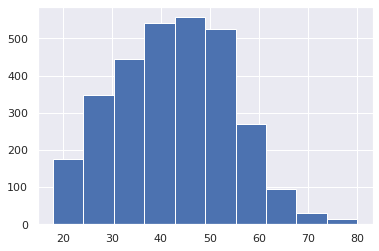

In [28]:
wage['age'].hist()

### pandas.cut -- Bin values into discrete intervals

In [29]:
df_cut, age_bins = pd.cut(df.age, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

### pandas.concat -- Concatenate pandas objects along a particular axis

In [30]:
df_age_groups = pd.concat([wage.age, df_cut, wage.wage], keys=['age','age_cuts','wage'], axis=1)
df_age_groups.head(5)

,age,age_cuts,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


### pandas.get_dummies -- Convert categorical variable into dummy/indicator variables

In [32]:
# Create dummy variables for the age groups
df_age_groups_dummies = pd.get_dummies(df_age_groups['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_age_groups_dummies = sm.add_constant(df_age_groups_dummies)

df_age_groups_dummies.head(5)

,const,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1.0,1,0,0,0
1,1.0,1,0,0,0
2,1.0,0,1,0,0
3,1.0,0,1,0,0
4,1.0,0,0,1,0


### Fit a model using statsmodels GLM

We use statsmodels because it provides more complete output of the coefficients.

__We drop the first age group such that the constant will represent the wage for that group__

In [33]:
step_model = sm.GLM(df_age_groups.wage, df_age_groups_dummies.drop(df_age_groups_dummies.columns[1], axis=1)).fit()
step_model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


### Use R-Style formular

In [34]:
df_age_groups_dummies = pd.get_dummies(df_age_groups['age_cuts'])
df_steps = pd.concat([df_age_groups, df_age_groups_dummies], axis=1)
df_steps.rename(columns={cut: "ag_{}".format(i+1) for i, cut in enumerate(df_age_groups_dummies.columns)}, inplace=True)
df_steps

,age,age_cuts,wage,ag_1,ag_2,ag_3,ag_4
0,18,"(17.938, 33.5]",75.043154,1,0,0,0
1,24,"(17.938, 33.5]",70.476020,1,0,0,0
2,45,"(33.5, 49.0]",130.982177,0,1,0,0
3,43,"(33.5, 49.0]",154.685293,0,1,0,0
4,50,"(49.0, 64.5]",75.043154,0,0,1,0
...,...,...,...,...,...,...,...
2995,44,"(33.5, 49.0]",154.685293,0,1,0,0
2996,30,"(17.938, 33.5]",99.689464,1,0,0,0
2997,27,"(17.938, 33.5]",66.229408,1,0,0,0
2998,27,"(17.938, 33.5]",87.981033,1,0,0,0


In [40]:
age_group_labels = ["ag_{}".format(i+1) for i, _ in enumerate(df_age_groups_dummies.columns)]
formular = 'wage~{}'.format('+'.join(age_group_labels[1:]))
formular

'wage~ag_2+ag_3+ag_4'

In [41]:
step_model2 = smf.glm(formula=formular, data=df_steps).fit()
step_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1634.1
Method:                          IRLS   Log-Likelihood:                -15353.
Date:                Tue, 06 Oct 2020   Deviance:                   4.8957e+06
Time:                        14:05:52   Pearson chi2:                 4.90e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.1584      1.476     63.790      0.000      91.265      97.051
ag_2          24.0535      1.829     13.148      0.000      20.468      27.639
ag_3          23.6646      2.068     11.443      0.000      19.611      27.718
ag_4           7.6406      4.987      1.532      0.126      -2.135      17.416
==============================================================================
"""

### Predict using piecewise regression

In [42]:
#age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1, 1)
age_grid = np.arange(wage.age.min(), wage.age.max())[:, np.newaxis]
#print(age_grid)
bin_mapping = np.digitize(age_grid.ravel(), age_bins)
#print(bin_mapping)

In [43]:
X_test = pd.get_dummies(bin_mapping, prefix='ag')
X_test.drop(columns=['ag_1'], axis=1, inplace=True)
X_test

,ag_2,ag_3,ag_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
57,0,0,1
58,0,0,1
59,0,0,1
60,0,0,1


In [44]:
y_pred = step_model2.predict(X_test)

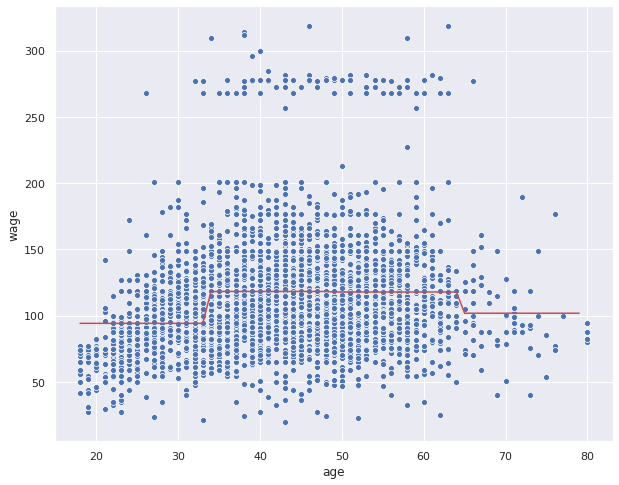

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="age", y="wage", data=wage)
ax.plot(age_grid, y_pred, c='r')
plt.show()

## 6. Splines

We can use the dmatrix and statsmodel to fit cubic splines and natual cubic spline.

In [50]:
from patsy import dmatrix

### patsy.bs - generate B-spline basis

```
patsy.bs(x, df=None, knots=None, degree=3, include_intercept=False, lower_bound=None, upper_bound=None)
```

See https://patsy.readthedocs.io/en/latest/API-reference.html

### patsy.cr - generate a natural cubic spline basis
```
patsy.cr(x, df=None, knots=None, lower_bound=None, upper_bound=None, constraints=None)
```

### Spline fit with 3 knots

In [51]:
transformed_x = dmatrix("bs(wage.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"wage.age": wage.age}, return_type='dataframe')
fit4 = sm.GLM(df.wage, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit4.params

Intercept                                                                 60.493714
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

### Spline fit with 6 degrees of freedom

In [52]:
transformed_x2 = dmatrix("bs(wage.age, df=6, degree=3, include_intercept=False)",
                        {"wage.age": df.age}, return_type='dataframe')
fit5 = sm.GLM(df.wage, transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(age_grid, df=6, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit5.params

Intercept                                                   56.313841
bs(wage.age, df=6, degree=3, include_intercept=False)[0]    27.824002
bs(wage.age, df=6, degree=3, include_intercept=False)[1]    54.062546
bs(wage.age, df=6, degree=3, include_intercept=False)[2]    65.828391
bs(wage.age, df=6, degree=3, include_intercept=False)[3]    55.812734
bs(wage.age, df=6, degree=3, include_intercept=False)[4]    72.131473
bs(wage.age, df=6, degree=3, include_intercept=False)[5]    14.750876
dtype: float64

### Natural spline

In [57]:
# Specifying 4 degrees of freedom
transformed_x3 = dmatrix("cr(df.age, df=4)", {"df.age": wage.age}, return_type='dataframe')
fit6 = sm.GLM(df.wage, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))
fit6.params

Intercept              79.642095
cr(df.age, df=4)[0]   -14.667784
cr(df.age, df=4)[1]    36.811142
cr(df.age, df=4)[2]    35.934874
cr(df.age, df=4)[3]    21.563863
dtype: float64

### Plot the fit

Text(0, 0.5, 'wage')

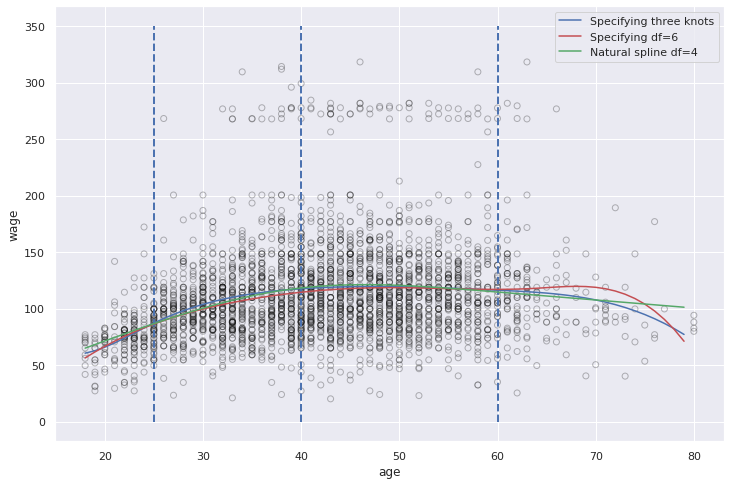

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(age_grid, pred4, color='b', label='Specifying three knots')
ax.plot(age_grid, pred5, color='r', label='Specifying df=6')
ax.plot(age_grid, pred6, color='g', label='Natural spline df=4')
[ax.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
ax.legend()
ax.set_xlabel('age')
ax.set_ylabel('wage')

## 7. GAM model

### pyGAM - a Python Implementation of the Generalized Additive Models (GAMs)


In [ ]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


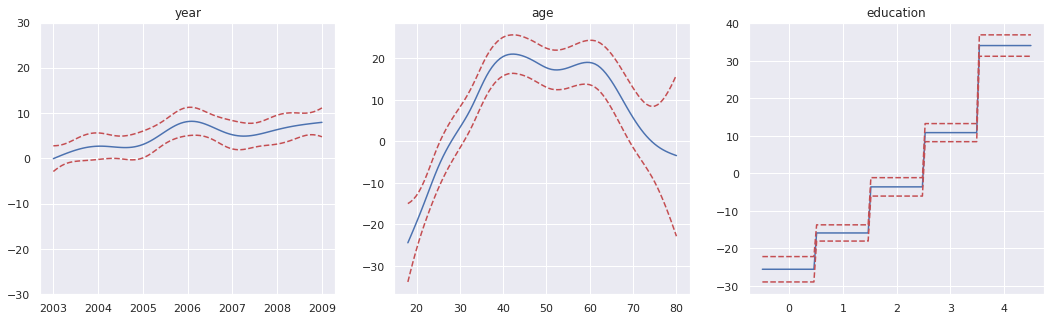

In [69]:
## plotting
fig, axs = plt.subplots(1,3, figsize=(18,5));

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

### statsmodels.gam

The following example is from https://www.statsmodels.org/stable/gam.html.

In [74]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.gam.tests.test_penalized import df_autos

In [71]:
x_spline = df_autos[['weight', 'hp']]
bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])
alpha = np.array([21833888.8, 6460.38479])
gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos, smoother=bs, alpha=alpha)
res_bs = gam_bs.fit()
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   189.13
Model Family:                Gaussian   Df Model:                        12.87
Link Function:               identity   Scale:                          4.8825
Method:                         PIRLS   Log-Likelihood:                -441.81
Date:                Tue, 06 Oct 2020   Deviance:                       923.45
Time:                        14:50:37   Pearson chi2:                     923.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.9923      1.997     26.034   

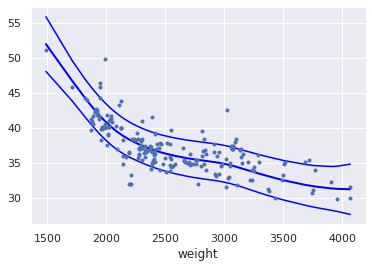

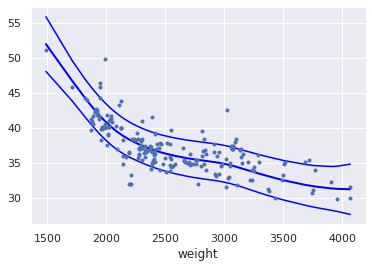

In [72]:
res_bs.plot_partial(0, cpr=True)

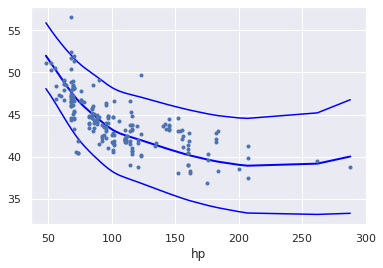

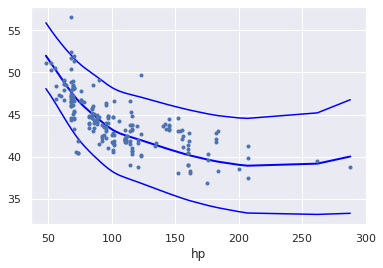

In [73]:
res_bs.plot_partial(1, cpr=True)